In [36]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.applications import imagenet_utils
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
import pandas as pd
from keras.models import Model
from keras import regularizers
import keras
import os
import tensorflow as tf
from keras.models import Sequential
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from keras.layers import Dense,Activation,Flatten,MaxPool2D,Conv2D,Dropout
from keras.layers.normalization import BatchNormalization
import keras.backend as K
import itertools
%matplotlib inline

In [37]:
from keras.datasets import cifar10
(X_train,y_train),(X_test, y_test) = cifar10.load_data()

In [38]:
datagen = ImageDataGenerator(rotation_range=90,
                           shear_range = 0.2,
                           zoom_range=0.2,
                          horizontal_flip=True)
datagen.fit(X_train)

In [39]:
y_train_one_hot = to_categorical(y_train,10)
y_test_one_hot = to_categorical(y_test,10)

In [40]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

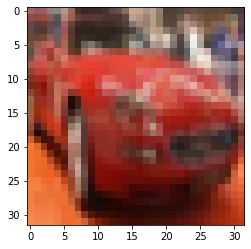

In [41]:
plt.imshow(X_train[5])

In [42]:
y_train[5]

array([1], dtype=uint8)

In [53]:
mobile = keras.applications.mobilenet.MobileNet(include_top=False,input_shape=(32,32,3))
        
mobile.summary()



Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 33, 33, 3)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 16, 16, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 16, 16, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 16, 16, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 16, 16, 32) 

In [54]:
x = mobile.output

x = Flatten()(x)
x=Dense(512, activation='relu',kernel_regularizer=regularizers.l2(0.0001))(x) 
x=Dropout(0.5)(x)
x=Dense(256, activation='relu',kernel_regularizer=regularizers.l2(0.0001))(x)
x=Dropout(0.5)(x)
x=Dense(256, activation='relu',kernel_regularizer=regularizers.l2(0.0001))(x)
x=Dropout(0.5)(x)

prediction_layer = Dense(10, activation='softmax')(x) 
model = Model(inputs=mobile.input, outputs=prediction_layer)

model.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 33, 33, 3)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 16, 16, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 16, 16, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 16, 16, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 16, 16, 32)        128 

In [56]:

for layer in mobile.layers[:-1]:
     layer.trainable = False

model.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 33, 33, 3)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 16, 16, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 16, 16, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 16, 16, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 16, 16, 32)        128 

In [68]:
model.load_weights('mobileciuptry.hdf5')

In [69]:
model.compile(Adam(lr=0.0001), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [70]:
epochs=10

his = model.fit(X_train,
                y_train_one_hot,
                validation_split = 0.3,
                batch_size=64,
                epochs = epochs)

Train on 35000 samples, validate on 15000 samples
Epoch 1/10
35000/35000 [==============================] - 148s 4ms/step - loss: 1.5526 - accuracy: 0.4962 - val_loss: 2.4086 - val_accuracy: 0.1031
Epoch 2/10
35000/35000 [==============================] - 142s 4ms/step - loss: 1.5389 - accuracy: 0.4999 - val_loss: 2.4090 - val_accuracy: 0.1019
Epoch 3/10
35000/35000 [==============================] - 144s 4ms/step - loss: 1.5300 - accuracy: 0.5019 - val_loss: 2.4080 - val_accuracy: 0.1019
Epoch 4/10
35000/35000 [==============================] - 141s 4ms/step - loss: 1.5292 - accuracy: 0.5015 - val_loss: 2.4080 - val_accuracy: 0.1020
Epoch 5/10
35000/35000 [==============================] - 142s 4ms/step - loss: 1.5153 - accuracy: 0.5104 - val_loss: 2.4085 - val_accuracy: 0.1029
Epoch 6/10
35000/35000 [==============================] - 144s 4ms/step - loss: 1.5218 - accuracy: 0.5114 - val_loss: 2.4072 - val_accuracy: 0.1042
Epoch 7/10
35000/35000 [==============================] - 143s

In [71]:
model.save_weights('mobileciuptry.hdf5')


## Evaluate by test data 

In [ ]:
model.evaluate(X_test,y_test_one_hot)

 7584/10000 [=====================>........] - ETA: 6s

## Accuracy

In [ ]:
#Accuracy

epoch_nums = range(1, epochs+1)
training_acc = his.history["accuracy"]
validation_acc = his.history["val_accuracy"]
plt.plot(epoch_nums , training_acc)
plt.plot(epoch_nums , validation_acc)
plt.xlabel('epoch')
plt.ylabel('acc ')
plt.legend(['training','validation'], loc='upper right')
plt.show()

## Loss

In [ ]:

epoch_nums = range(1, epochs+1)
training_loss = his.history["loss"]
validation_loss = his.history["val_loss"]
plt.plot(epoch_nums , training_loss)
plt.plot(epoch_nums , validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training','validation'], loc='upper right')
plt.show()

## predict an input image

In [ ]:
img_pred = image.load_img('truck3.jpg', target_size=(32,32,3))
plt.imshow(img_pred)
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis=0)

In [ ]:
#Get the probabilities

probabilities = model.predict(img_pred)
probabilities

In [ ]:
class_name =['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

index = np.argsort(probabilities[0,:])
print('Most likely class :', class_name[index[9]] , ', Probability : ', probabilities[0 , index[9]])
print('Most second  likely class :', class_name[index[8]] , ', Probability : ', probabilities[0 , index[8]])
print('Most third  likely class :', class_name[index[7]] , ', Probability : ', probabilities[0 , index[7]])


